# 5.1 - Intro Machine Learning - Aprendizaje Supervisado - Regresion

![venn_ml](../../images/venn_ml.png)

![ext_sklearn](../../images/ext_sklearn.jpeg)

![sklearn](../../images/sklearn.png)

### WorkFlow


1. [Obtener datos](#1.-Obtener-Datos)
2. [Definir objetivo](#2.-Definir-Objetivo)
3. [Limpieza de datos (unidades, outliers, one-hot, etc..)(**)](#3.-Limpieza-de-Datos)
4. [Definir modelo (regresión, clasificación, ...)](#4.-Modelo)
5. [Entrenar (hiperparámetros, validación, ...) (**)](#5.-Entrenamiento)
6. [Predecir (testear)](#6.-Predicción)
7. [Evaluación](#7.-Evaluación)
8. [Si hay mucho error volver a (**)](#WorkFlow)


Lo primero como siempre importamos nuestras librerías

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

%matplotlib inline

Para este ejemplo vamos a trabajar con un dataset sobre diamantes, la idea es predecir el precio de un diamante en base a sus características

### 1. Obtener Datos

**explicacion:**
    
+ carat:	peso del diamante (quilates)

+ cut:	calidad del corte (Fair, Ideal, Good, Very Good, Premium)

+ color: color (D (mejor) a J (peor))

+ clarity: claridad (I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor)) 

+ table: ancho del corte superior del diamante

+ x: largo en mm

+ y: ancho en mm

+ z: alto en mm

+ depth:	2*z/(x+y)

+ price:	precio en dolares USA


![dia](../../images/dia.jpg)

In [2]:
df=pd.read_csv('../../../data/diamonds.csv')

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


Vamos ver como es la calidad de nuestros datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


### 2. Definir nuestro objetivo

Como hemos dicho al principio nuestro objetivo es tratar de predecir el precio de un diamante en base a sus caracteristicas, carat, corte, color, clarity, etc...

### 3. Limpieza de Datos

El proceso de limpieza es el habitual:

+ Valores nulos
+ Datos inconsistentes 
+ Datos duplicados...

Todo esto implica realizar también un **EDA**. Además de eso, es necesario arreglar los datos, proceso llamado `data wrangling`. Este proceso consiste en preparar los datos de manera adecuada para que el modelo de machine learning "entienda" los datos de manera óptima. Por ejemplo, los datos de corte, color y claridad son datos categóricos que están en formato string, habrá que cambiar estos datos para alimentar al modelo, las máquinas solo entienden de números 🤣.

Este proceso no es solo necesario sino fundamental. **Todo está en los datos.**

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 9.2 MB


En principio nuestros datos parece que no contienen datos nulos, por lo que podemos avanzar al siguiente paso, en el caso de que si hubiera contenido datos nulos, deberíamos de haber explorado las columnas que contenían estos datos y decir como tratar esos valores nulos.

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,40455.0,NaN,NaN,NaN,0.797706,0.475544,0.2,0.4,0.7,1.04,4.5
cut,40455,5,Ideal,16220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,40455,7,G,8455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,40455,8,SI1,9749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,40455.0,NaN,NaN,NaN,61.752841,1.431725,43.0,61.0,61.8,62.5,79.0
table,40455.0,NaN,NaN,NaN,57.446133,2.233535,43.0,56.0,57.0,59.0,95.0
price,40455.0,NaN,NaN,NaN,3928.444469,3992.416147,326.0,945.0,2397.0,5331.0,18823.0
x,40455.0,NaN,NaN,NaN,5.729392,1.124453,0.0,4.71,5.69,6.54,10.23
y,40455.0,NaN,NaN,NaN,5.732819,1.14665,0.0,4.72,5.71,6.54,58.9
z,40455.0,NaN,NaN,NaN,3.537154,0.697062,0.0,2.91,3.52,4.035,8.06


El parámetro include 'all' del método describe nos muestra todos los datos estadísticos de nuestras columnas, incluyendo las categóricas que en su caso nos devuelve parámetros tales como el conteo, el número de valores únicos por categoría, la moda y su frecuencia.

Ahora vamos a imprimir nuestra matriz de correlación para comprobar si hay colinealidad entre las variables de nuestro dataset

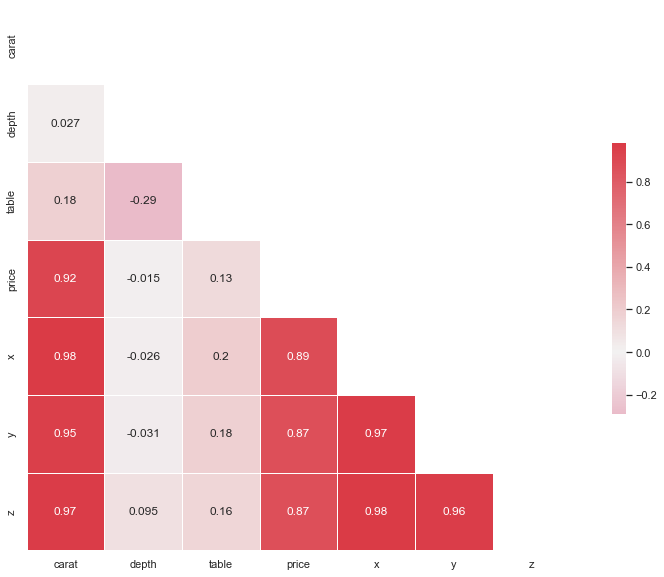

In [6]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

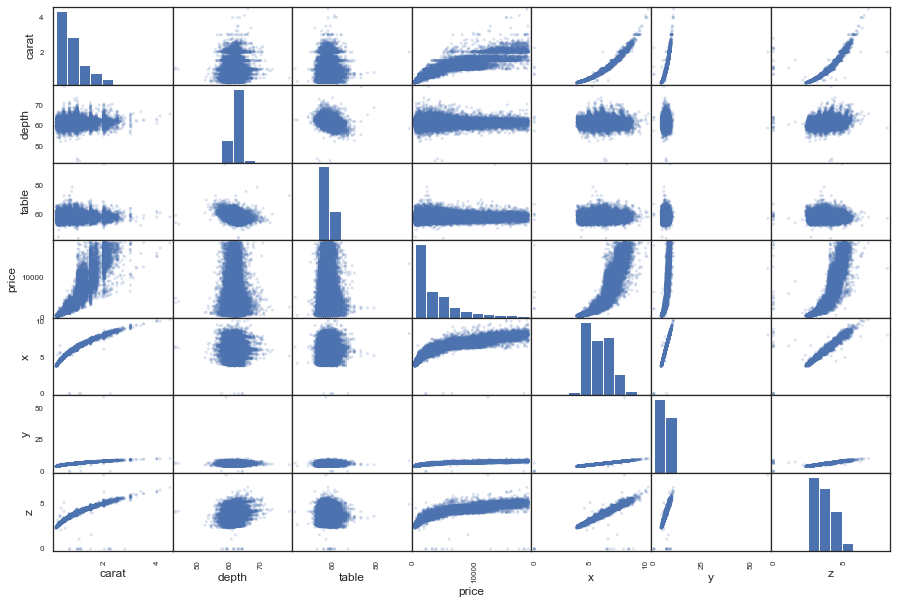

In [7]:
pd.plotting.scatter_matrix(df, figsize=(15, 10), alpha=0.2);

Vamos a ver alguna de las columnas en particular

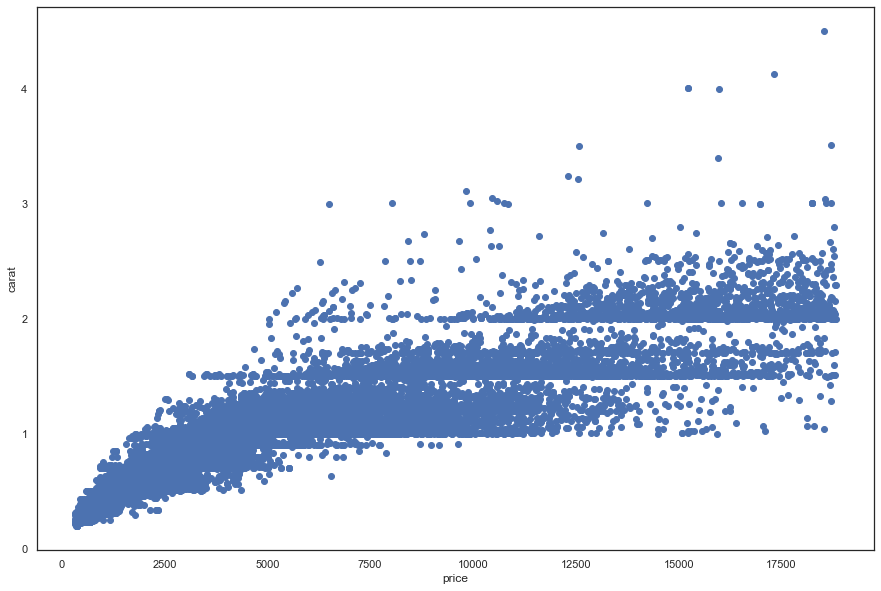

In [8]:
plt.figure(figsize=(15,10))

plt.scatter(df.price, df.carat)

plt.ylabel('carat')
plt.xlabel('price');

Al comparar precio y quilates vemos que hay cierta relación lineal, a más quilates mayor precio, aunque también podemos observar varios grupos en los que seguramente entre otro tipo de caracteristica que ayude a predecir su precio

Vamos a tratar de transformar esta variable para ver si podemos eliminar esa dependecia de otras caracteristicas para tratar de encontrar si hay o no relación lineal entre ambas, para ello podemos usar la transformación de box-cot.
Las transformaciones de Box y Cox son una familia de transformaciones potenciales usadas en estadística para corregir sesgos en la distribución de errores, para corregir varianzas desiguales (para diferentes valores de la variable predictora) y principalmente para corregir la no linealidad en la relación (mejorar correlación entre las variables). 

[Documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html) Libería Scipy

[Wikipedia](https://es.wikipedia.org/wiki/Transformaci%C3%B3n_Box-Cox) Transformación de Box y Cox

In [9]:
from scipy.stats import boxcox

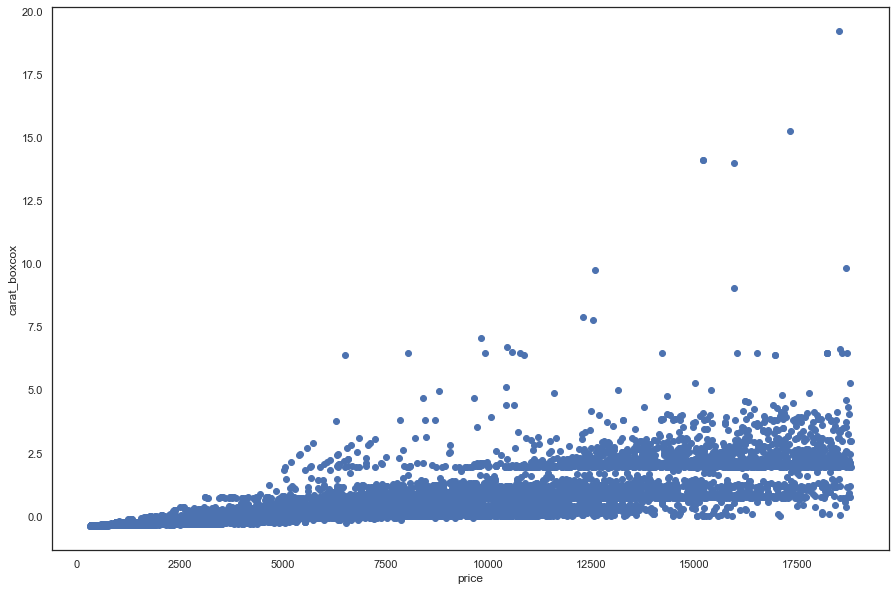

In [10]:
plt.figure(figsize=(15,10))


carat_boxcox=boxcox(df.carat, lmbda=2.618033) #este lambda es un valor aleatorio la idea sería ir haciendo experimentos

plt.scatter(df.price, carat_boxcox)
plt.xlabel('price')
plt.ylabel('carat_boxcox');

## Reflexión : ¿Cómo podemos asegurarnos de que de verdad son diamantes?

1 carat es igual a 200mg de diamante.

Densidad del diamante es 2,26 gm/cm3

Con estos datos vamos a tratar de ver si todos los elementos que tenemos en nuestro dataset son diamantes o no, para ello vamos a realizar una copia de nuestros datos y vamos a añadirle una serie de nuevas columnas

In [11]:
df2=df.copy()

df2['gr'] = 0.2 * df2.carat # obtenemos el peso del diamante a partir de los quilates

df2['vol']=df2.x * df2.y * df2.z / 2.5 / 1000 # obtenemos el volumen aproximando

df2['density']= df2.gr / df2.vol # obtenemos la densidad aproximada a partir de su peso y volumen

df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,gr,vol,density
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,0.242,0.078839,3.069559
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,0.064,0.020958,3.053683
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,0.142,0.045375,3.129493
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,0.082,0.026508,3.093462
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,0.204,0.067372,3.027965


In [12]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,40455.0,0.797706,0.475544,0.200000,0.400000,0.700000,1.040000,4.500000e+00
depth,40455.0,61.752841,1.431725,43.000000,61.000000,61.800000,62.500000,7.900000e+01
table,40455.0,57.446133,2.233535,43.000000,56.000000,57.000000,59.000000,9.500000e+01
price,40455.0,3928.444469,3992.416147,326.000000,945.000000,2397.000000,5331.000000,1.882300e+04
x,40455.0,5.729392,1.124453,0.000000,4.710000,5.690000,6.540000,1.023000e+01
y,40455.0,5.732819,1.146650,0.000000,4.720000,5.710000,6.540000,5.890000e+01
z,40455.0,3.537154,0.697062,0.000000,2.910000,3.520000,4.035000,8.060000e+00
gr,40455.0,0.159541,0.095109,0.040000,0.080000,0.140000,0.208000,9.000000e-01
vol,40455.0,0.051921,0.031562,0.000000,0.025956,0.045876,0.068338,1.536239e+00
density,40455.0,inf,NaN,0.260376,3.023931,3.058436,3.095017,inf


Vemos que la densidad en algunos casos se nos sale de los calculos normales, esto nos está indicando que algunos de los datos que tenemos no son diamantes

In [13]:
df2[df2.density > 3.9].shape

(27, 13)

Nos basamos en la densidad del diamante que es 3,5, pero dado que nuestro calculo del volumen ha sido una aproximación vamos a dar un margen, con estos datos vemos que hay 27 registros que están por encima de 3.9 y por debajo de 2.9, posiblemente sean lo que se denominan diamantes sintéticos, que se usan en la industria de semiconductores

Por ello si queremos realmente predecir el precio de un diamante como tal este tipo de datos debemos excluirlos porque pueden introducir sesgos en nuestros modelos.

In [14]:
df2[df2.density < 2.9].shape

(56, 13)

In [15]:
diamonts = df2[(df2.density>2.9)&(df2.density<3.9)]

Una vez tenemos las transformaciones que necesitabamos vamos a pasar a la preparación de los datos para entrenar nuestro modelo, cabe decir que si queremos realizar nuestro experimentos de forma óptima deberíamos de hacer este proceso por separado y de forma independiente para cada uno de nuestros modelos ya que dependiendo del algoritmo que vayamos a entrenar una transformación de datos puede mejorar o empeorar su desempeño.

Lo primero que debemos hacer es dividir nuestro set de datos en datos de entrenamiento y datos de test, esto lo hacemos para poder probar el desempeño de nuestro modelo con datos que no conoce, y así comprobar la eficacia del mismo cuando recibamos datos nuevos y queramos predecir el precio de un nuevo diamante, con la salvedad de que en nuestros datos de test si tenemos precio por lo que con el podemos evaluar como se está desviando.

## Separación de datos.

![X_y_tts](../../images/X_y_tts.png)

Antes de transformar definitivamente nada, vamos a separar los datos en X e y. y será la columna objetivo, es decir, el precio. La columna objetivo nunca se toca, nunca se transforma en ningún sentido. X serán el resto de columnas, la características con las que realizaremos nuestras predicciones.

**0 arreglar datos**

Antes de dividir nuestros datos vamos ver cuales de nuestras variables tienen una mayor correlación con nuestra variable dependiente, esto nos puede ayudar a la hora de elegir que variables escoger para entrenar a nuestro modelo, para ello utilizaremos la matriz de correlación

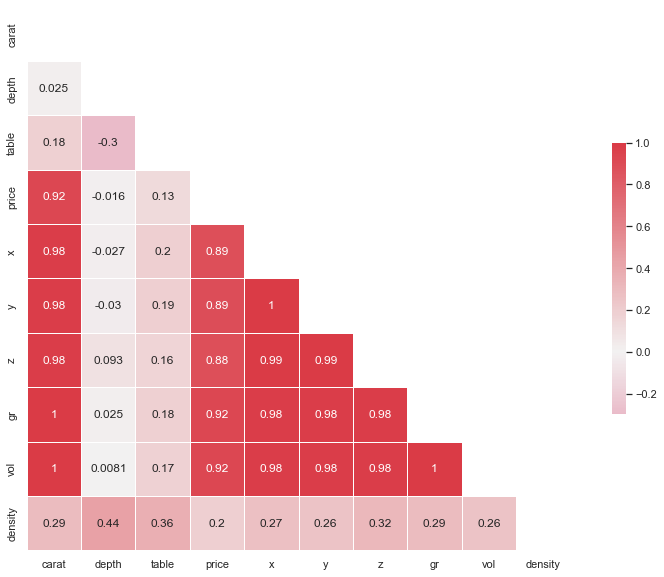

In [16]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(diamonts.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(diamonts.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

A simple vista podemos observar que 'depth','table' y 'density' tiene una correlacción muy baja con nuestra variable dependiente por lo que son candidatas a ser excluidas de nuestro set de entrenamiento, pero de momento vamos a dejarlas.

El primer paso es separar los datos de entrenamiento de nuestro variable objetivo o variable dependiente

In [17]:
X = diamonts.drop('price', axis=1)

y = diamonts.price

X.head()

,carat,cut,color,clarity,depth,table,x,y,z,gr,vol,density
0,1.21,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25,0.242,0.078839,3.069559
1,0.32,Very Good,H,VS2,63.0,57.0,4.35,4.38,2.75,0.064,0.020958,3.053683
2,0.71,Fair,G,VS1,65.5,55.0,5.62,5.53,3.65,0.142,0.045375,3.129493
3,0.41,Good,D,SI1,63.8,56.0,4.68,4.72,3.00,0.082,0.026508,3.093462
4,1.02,Ideal,G,SI1,60.5,59.0,6.55,6.51,3.95,0.204,0.067372,3.027965


Vamos a usar la transformación de box-cot

In [18]:
X.carat=boxcox(X.carat, lmbda=2.618033)

Ahora volvemos a ejecutar la matriz de correlación pero en este caso buscamos ver la colinealidad de nuestras variables de entrenamiento entre ellas, ya que si tienen una correlación alta es un indicativo de colinealidad.

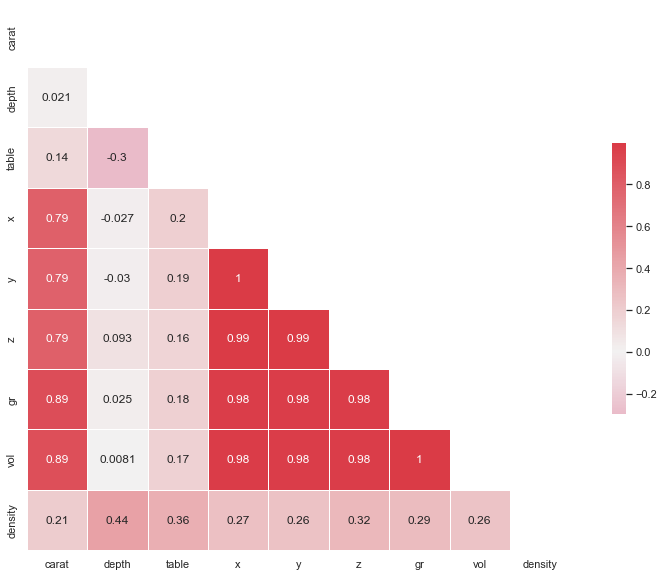

In [19]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(X.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(X.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

Table tiene correlación negativa respecto a 'depth' y puede introducir ruido en nuestro modelo por lo que vamos a prescindir de ella

In [20]:
X=X.drop('table', axis=1)

X.head()

,carat,cut,color,clarity,depth,x,y,z,gr,vol,density
0,0.247192,Premium,J,VS2,62.4,6.83,6.79,4.25,0.242,0.078839,3.069559
1,-0.362625,Very Good,H,VS2,63.0,4.35,4.38,2.75,0.064,0.020958,3.053683
2,-0.226149,Fair,G,VS1,65.5,5.62,5.53,3.65,0.142,0.045375,3.129493
3,-0.344959,Good,D,SI1,63.8,4.68,4.72,3.00,0.082,0.026508,3.093462
4,0.020325,Ideal,G,SI1,60.5,6.55,6.51,3.95,0.204,0.067372,3.027965


Antes de continuar vemos que tenemos también columnas categóricas por lo que debemos de transformalas para que podamos incluirlas en nuestro análisis de correlación.

**Tenemos diferentes métodos para transformar variables categóricas a númericas**
    
    + Generar variables dummies: Consiste en tomar cada uno de los valores únicos de nuestra columna y generar una columna nueva por cada uno de estos valores y transformalar a  binomial, es decir si la variable pertenece a ese valor o no, asignando 1 si lo es y 0 sino lo es.
    + Label encoder: Básicamente es asignar un valor númerico a cada una de las categorías de nuestra columna.

In [21]:
X_dum=pd.get_dummies(X, columns=['cut', 'color', 'clarity'])   # drop_first=True, por defecto es False 

X_dum.head()

,carat,depth,x,y,z,gr,vol,density,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.247192,62.4,6.83,6.79,4.25,0.242,0.078839,3.069559,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-0.362625,63.0,4.35,4.38,2.75,0.064,0.020958,3.053683,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.226149,65.5,5.62,5.53,3.65,0.142,0.045375,3.129493,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.344959,63.8,4.68,4.72,3.00,0.082,0.026508,3.093462,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0.020325,60.5,6.55,6.51,3.95,0.204,0.067372,3.027965,0,0,...,0,0,0,0,1,0,0,0,0,0


Hay que ser cauto con este tipo de transformación porque en el caso de que una de las columnas tenga un número elevado de categorías estaremos añadiendo muchas dimensiones a nuestros datos, con lo que aumentará su coste computacional

**Label Enconder**

In [22]:
#%!pip install scikit-learn

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
X_Enc = X.copy()

In [25]:
X_Enc.cut = LabelEncoder().fit_transform(X_Enc.cut)
X_Enc.color = LabelEncoder().fit_transform(X_Enc.color)
X_Enc.clarity = LabelEncoder().fit_transform(X_Enc.clarity)

In [26]:
X_Enc.head()

,carat,cut,color,clarity,depth,x,y,z,gr,vol,density
0,0.247192,3,6,5,62.4,6.83,6.79,4.25,0.242,0.078839,3.069559
1,-0.362625,4,4,5,63.0,4.35,4.38,2.75,0.064,0.020958,3.053683
2,-0.226149,0,3,4,65.5,5.62,5.53,3.65,0.142,0.045375,3.129493
3,-0.344959,1,0,2,63.8,4.68,4.72,3.00,0.082,0.026508,3.093462
4,0.020325,2,3,2,60.5,6.55,6.51,3.95,0.204,0.067372,3.027965


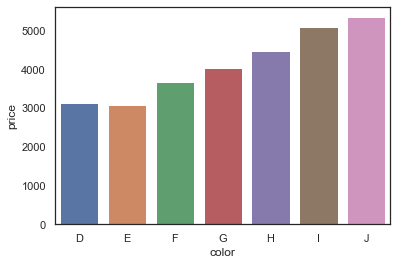

In [27]:
sns.barplot(df.groupby('color').mean().index, 
            df.groupby('color').mean().price);

Cuidado con esto porque con esta transformación el modelo puede interpretar que cuando el color tiene una calificación de 'D' es menor, pero si investigamos un poco veremos que el 'D' es el rango más alto de color por lo que debería de ser al revés.

[Color de los diamantes](https://www.tiffany.es/engagement/the-tiffany-guide-to-diamonds/color/)

In [28]:
# label encoder custom

color={'J': 1, 'I': 2, 'H': 5, 'G':15, 'F': 25, 'E': 30, 'D':45}  # aqui es donde entra el conocimiento experto


def cambio_color(x):   #esto es la lambda
    return color[x]    # x es una key del diccionario color, color[x] es el value

#X.color=X.color.apply(cambio_color)

X.color=X.color.apply(lambda x: color[x])

X.head()

,carat,cut,color,clarity,depth,x,y,z,gr,vol,density
0,0.247192,Premium,1,VS2,62.4,6.83,6.79,4.25,0.242,0.078839,3.069559
1,-0.362625,Very Good,5,VS2,63.0,4.35,4.38,2.75,0.064,0.020958,3.053683
2,-0.226149,Fair,15,VS1,65.5,5.62,5.53,3.65,0.142,0.045375,3.129493
3,-0.344959,Good,45,SI1,63.8,4.68,4.72,3.00,0.082,0.026508,3.093462
4,0.020325,Ideal,15,SI1,60.5,6.55,6.51,3.95,0.204,0.067372,3.027965


In [29]:
X.cut = LabelEncoder().fit_transform(X.cut)
X.clarity = LabelEncoder().fit_transform(X.clarity)

X.head()

,carat,cut,color,clarity,depth,x,y,z,gr,vol,density
0,0.247192,3,1,5,62.4,6.83,6.79,4.25,0.242,0.078839,3.069559
1,-0.362625,4,5,5,63.0,4.35,4.38,2.75,0.064,0.020958,3.053683
2,-0.226149,0,15,4,65.5,5.62,5.53,3.65,0.142,0.045375,3.129493
3,-0.344959,1,45,2,63.8,4.68,4.72,3.00,0.082,0.026508,3.093462
4,0.020325,2,15,2,60.5,6.55,6.51,3.95,0.204,0.067372,3.027965


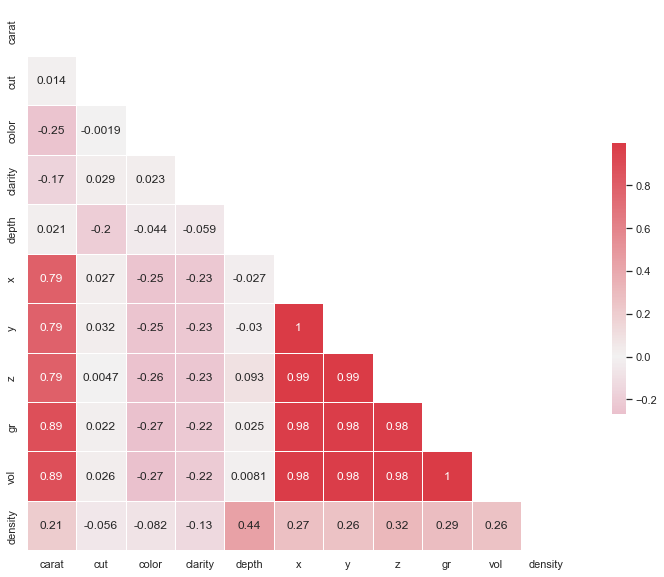

In [30]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(X.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(X.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [31]:
X = X[['carat', 'cut', 'color', 'depth', 'density']]

X.head()

,carat,cut,color,depth,density
0,0.247192,3,1,62.4,3.069559
1,-0.362625,4,5,63.0,3.053683
2,-0.226149,0,15,65.5,3.129493
3,-0.344959,1,45,63.8,3.093462
4,0.020325,2,15,60.5,3.027965


Una vez que nos hemos decantado por estas variables ahora sí vamos a dividir nuestro set de datos en entrenamiento y test, para ello utilizamemos el método train_test_split de la libería scikit-learn

In [32]:
from sklearn.model_selection import train_test_split # el alias es cosa mia

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32297, 5), (8075, 5), (32297,), (8075,))

Si nos fijamos vemos que la escala de nuestros datos no es la misma en todas las columnas, en ocasiones y dependiendo del modelo esto no relevante, pero es bueno tenerlo en cuenta, por lo que sería bueno hacer varios experimentos para ver como es el desempeño de nuestro modelo.
Existen varios modelos de escalado de datos, vamos a centrarnos en dos principalmente:

    + Standar scaler: Esta transfomación realiza la siguiente operación 

$$\alpha =\frac{ ({x}-\mu)}{\sigma}$$

    + Min - Max scaler:

$$\alpha =\frac{ ({x}-\min)}{{\max}-{\min}}$$

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [34]:
sc = StandardScaler().fit(X_train)
mm = MinMaxScaler().fit(X_train)

Ahora con ellos podemos transformar nuestros set de datos y probarlos por separa para ver con cual de los dos funciona mejor, es importante realizar el ajuste del scaler únicamente con los datos train, con la intención de dar a nuestro modelo la menor información sobre los datos de test para que nuestro experimento sea lo más veraz posible

In [35]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)
X_train_mm = mm.transform(X_train)
X_test_mm = mm.transform(X_test)

X_train_sc.shape, X_train_mm.shape

((32297, 5), (32297, 5))

In [36]:
X_train_sc.shape

(32297, 5)

### 4. Elección de modelo

Llegados a este punto y en base a la definición de nuestro objetivo tendremos que decantarnos por la elección de un modelo y sus hiperparámetros. Como hablamos al principio de este capítulo tenemos dos grandes grupos según la problemática que se nos plantee.

    + Modelos de regresión. Para predecir un número (Caso que nos ocupa)
    + Modelos de clasificación. Para predecir una clase

### 5. Entrenamiento de Modelos

Una vez que ya tenemos nuestros datos transfomados y escalados podemos proceder a entrenar nuestro modelo, para una primera aproximación vamos a decantarnos por el modelo más sencillo que es una regresión lineal

In [37]:
from sklearn.linear_model import LinearRegression

Vamos a generar tres modelos uno para cada uno de nuestros set de datos, uno para los que están sin estandarizar, otro para los datos de Standar Scaler y otro para los de Min-Max Scaler

In [38]:
ln = LinearRegression()
ln_sc = LinearRegression()
ln_mm = LinearRegression()

In [39]:
ln.fit(X_train, y_train)
ln_sc.fit(X_train_sc,y_train)
ln_mm.fit(X_train_mm,y_train)

LinearRegression()

### 6. Predicciones

In [40]:
preds =ln.predict(X_test)
preds_sc =ln_sc.predict(X_test_sc)
preds_mm = ln_mm.predict(X_test_mm)

In [41]:
preds[:10]

array([16168.59135581,  2437.83878671,  2258.15545178,  5664.37923025,
        8230.45531482,  3653.69496727,  4066.31412469,  1839.77603713,
        8809.35162251,  2392.8058233 ])

In [42]:
preds_sc[:10]

array([16168.59135581,  2437.83878671,  2258.15545178,  5664.37923025,
        8230.45531482,  3653.69496727,  4066.31412469,  1839.77603713,
        8809.35162251,  2392.8058233 ])

In [45]:
preds_mm[:10]

array([16168.59135581,  2437.83878671,  2258.15545178,  5664.37923025,
        8230.45531482,  3653.69496727,  4066.31412469,  1839.77603713,
        8809.35162251,  2392.8058233 ])

### 7. Evaluacion

In [64]:
ln.score(X_train, y_train), ln_sc.score(X_train_sc, y_train), ln_mm.score(X_train_mm, y_train)

(0.7031174777339552, 0.703117477733955, 0.703117477733955)

In [65]:
ln.score(X_test, y_test), ln_sc.score(X_test_sc, y_test), ln_mm.score(X_test_mm, y_test)

(0.6505655591101658, 0.6505655591101652, 0.6505655591101654)

In [47]:
from sklearn.metrics import mean_squared_error as mse

In [67]:
mse(y_train, ln.predict(X_train), squared=False)

2177.8217175075383

In [48]:
mse(y_test, preds, squared=False)

2339.953331045755

### 8. Otros modelos

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rf = RandomForestRegressor()
rf_sc = RandomForestRegressor()
rf_mm = RandomForestRegressor()

In [60]:
rf.fit(X_train, y_train)
rf_sc.fit(X_train_sc, y_train)
rf_mm.fit(X_train_mm, y_train)

RandomForestRegressor()

In [54]:
rf.predict(X_test)

array([13853.9       ,  1451.22609524,   698.48      , ...,
        4263.56      ,  1686.33583333,  6650.95566667])

In [62]:
rf.score(X_train, y_train), rf_sc.score(X_train_sc, y_train), rf_mm.score(X_train_mm, y_train)

(0.9879272079881799, 0.9878240355726214, 0.9878660421896832)

In [61]:
rf.score(X_test, y_test), rf_sc.score(X_test_sc, y_test), rf_mm.score(X_test_mm, y_test)

(0.9159667636311799, 0.9152892448769518, 0.9157586595167349)

In [63]:
mse(y_train, rf.predict(X_train), squared=False)

439.17121617213405

In [58]:
mse(y_test, rf.predict(X_test), squared=False)

1146.7918171150147